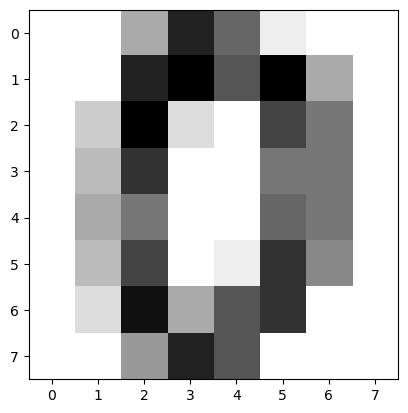

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [4]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

# 이미지를 평판화 n x sample x 8 8 => n_sample x 64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [6]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 64)
y train : (1437,)
X test : (360, 64)
y test : (360,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9611111111111111
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  1  0  0  0  0  0]
 [ 0  1 36  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  1  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 32  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  1  0  1  0  0  0 23  1]
 [ 0  0  0  1  1  0  0  0  1 25]]


C:\anaconda_new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9916666666666667
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  1  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  0 28]]


In [11]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8694444444444445
[[33  0  0  0  0  2  1  0  0  0]
 [ 0 36  3  0  2  1  0  0  0  1]
 [ 0  2 32  2  0  0  0  1  0  0]
 [ 0  2  0 44  0  0  0  0  1  2]
 [ 0  1  0  0 29  1  1  0  0  0]
 [ 0  0  0  1  3 32  1  0  1  0]
 [ 1  1  0  0  1  1 30  0  0  0]
 [ 0  0  0  1  0  0  0 33  0  2]
 [ 1  2  0  1  0  0  0  0 23  0]
 [ 0  0  0  1  1  1  0  2  2 21]]


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.9833333333333333
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  1  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  1  0]
 [ 0  0  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  1  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  1 27]]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [15]:
# 테스트 데이터로 예측해본다.

y_pred = knn.predict(X_test)
# 정확도를 계산한다.

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9861111111111112


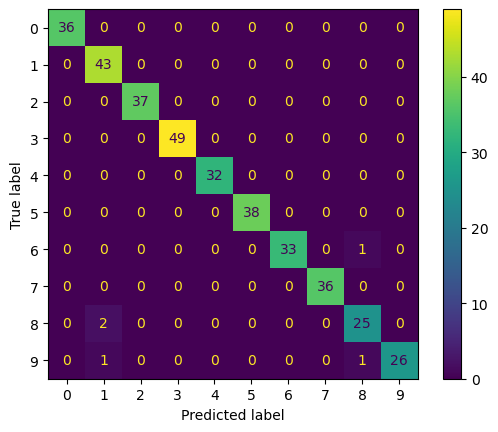

In [16]:
disp = metrics.plot_confusion_matrix(knn, X_test, y_test)
plt.show()

In [36]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(50, activation='sigmoid', input_shape=(64,)))
    model.add(layers.Dense(40, activation='sigmoid'))
    model.add(layers.Dense(30, activation='sigmoid'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.04), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 50)                3250      
                                                                 
 dense_18 (Dense)            (None, 40)                2040      
                                                                 
 dense_19 (Dense)            (None, 30)                1230      
                                                                 
 dense_20 (Dense)            (None, 10)                310       
                                                                 
Total params: 6,830
Trainable params: 6,830
Non-trainable params: 0
_________________________________________________________________


In [38]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=50, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100


ValueError: in user code:

    File "C:\anaconda_new\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\anaconda_new\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\anaconda_new\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\anaconda_new\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\anaconda_new\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\anaconda_new\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\anaconda_new\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\anaconda_new\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\anaconda_new\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\anaconda_new\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
